In [ ]:
!pip install ffmpeg


  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=328c500358968c83f2fa3237301120ead9072895ee88e4eb527bd24a47245f04
  Stored in directory: /root/.cache/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg


In [ ]:
!pip install pydub

In [ ]:
!pip install openai-whisper

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os, sys, re

video_file_path = "/content/drive/MyDrive/OS-Project/Cheetah ｜ Amazing Animals.mp4" #@param {type:"string"}
output_file_extension = 'mp3' #@param ["m4a", "mp3", "opus", "flac", "wav"]

delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
output_file_path = re.search("^[\/].+\/", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path.group(0)
os.environ['fileName'] = filename_raw
os.environ['fileType'] = output_file_extension

!ffmpeg -hide_banner -i "$inputFile" -vn -c:a libmp3lame "$outputPath"/"$fileName"-audio."$fileType"

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from '/content/drive/MyDrive/OS-Project/Cheetah ｜ Amazing Animals.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2mp41
    encoder         : Lavf61.9.100
  Duration: 00:01:46.02, start: 0.000000, bitrate: 1852 kb/s
  Stream #0:0(eng): Video: vp9 (Profile 0) (vp09 / 0x39307076), yuv420p(tv, bt709), 1920x1080, 1721 kb/s, SAR 1:1 DAR 16:9, 29.97 fps, 29.97 tbr, 16k tbn, 16k tbc (default)
    Metadata:
      handler_name    : VideoHandler
      vendor_id       : [0][0][0][0]
  Stream #0:1(eng): Audio: opus (Opus / 0x7375704F), 48000 Hz, stereo, fltp, 122 kb/s (default)
    Metadata:
      handler_name    : SoundHandler
      vendor_id       : [0][0][0][0]
File '/content/drive/MyDrive/OS-Project//Cheetah ｜ Amazing Animals-audio.mp3' already exists. Overwrite? [y/N] y
Stream mapping:
  Stream #0:1 -> #0:0 (opus (native) -> mp3 (libmp3lame))
Press [q] to stop, [?] for help
Output #0, mp3, to '/content/dri

Start here

In [ ]:
from pydub import AudioSegment
import os

# Load your audio file
audio = AudioSegment.from_file("/content/drive/MyDrive/OS-Project/Cheetah ｜ Amazing Animals-audio.mp3", format="mp3")

chunk_durations = [10, 20, 30]  # durations in seconds

for duration in chunk_durations:
    print(f"\n--- Testing with chunk size: {duration} seconds ---")
    chunk_length = duration * 1000  # Convert to milliseconds

    audio = AudioSegment.from_file("/content/drive/MyDrive/OS-Project/Cheetah ｜ Amazing Animals-audio.mp3", format="mp3")
    chunks = [audio[i:i + chunk_length] for i in range(0, len(audio), chunk_length)]

    # ✅ Make sure we create the directory in Google Drive
    chunk_output_dir = f"/content/drive/MyDrive/OS-Project/audio_chunks_{duration}s"
    os.makedirs(chunk_output_dir, exist_ok=True)

    for i, chunk in enumerate(chunks):
        chunk.export(f"{chunk_output_dir}/chunk_{i}.mp3", format="mp3")


# Split audio into chunks
chunks = [audio[i:i + chunk_length] for i in range(0, len(audio), chunk_length)]

# Create a directory to save the chunks
os.makedirs("audio_chunks", exist_ok=True)

# Export each chunk as a separate file
for i, chunk in enumerate(chunks):
    chunk.export(f"/content/drive/MyDrive/OS-Project/chunk_{i}.mp3", format="mp3")


--- Testing with chunk size: 10 seconds ---

--- Testing with chunk size: 20 seconds ---

--- Testing with chunk size: 30 seconds ---


Run the cell below to test out the CPU usage and mark it down

In [ ]:
!pip install gputil

import psutil

import threading
import time
import whisper
import GPUtil

chunk_durations = [10, 20, 30]  # You can adjust these if needed

def monitor_resources(duration, stop_flag):
    print(f"🔍 Monitoring for {duration}s Chunk")
    while not stop_flag["stop"]:
        tpu = psutil.cpu_percent(interval=1)
        mem = psutil.virtual_memory().percent
        print(f"  [Monitor] GPU: {tpu}%, Memory: {mem}%", end='')



        # GPU Monitoring (if available)
        gpus = GPUtil.getGPUs()
        if gpus:
            gpu = gpus[0]
            print(f", GPU Load: {gpu.load*100:.1f}%, GPU Memory: {gpu.memoryUsed}/{gpu.memoryTotal} MB")
        else:
            print()

def transcribe_with_monitoring(duration):
    print(f"\n========== Transcribing {duration}s Chunk ==========")

    # Load model (to GPU if available)
    model = whisper.load_model("base")
    if whisper.available_models() and GPUtil.getGPUs():
        model = model.to("cuda")

    chunk_path = f"/content/drive/MyDrive/OS-Project/audio_chunks_{duration}s/chunk_0.mp3"

    stop_flag = {"stop": False}
    monitor_thread = threading.Thread(target=monitor_resources, args=(duration, stop_flag))
    monitor_thread.start()

    start_time = time.time()
    result = model.transcribe(chunk_path)
    end_time = time.time()

    stop_flag["stop"] = True
    monitor_thread.join()

    print(f"\n✅ Chunk Size: {duration}s")
    print(f"⏱️ Time Taken: {end_time - start_time:.2f} seconds")
    print(f"📝 Transcription:\n{result['text']}")

# Run for all chunk durations
for duration in chunk_durations:
    transcribe_with_monitoring(duration)


ModuleNotFoundError: No module named 'whisper'


========== Transcribing 10s Chunk ==========


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")



✅ Chunk Size: 10s
⏱️ Time Taken: 5.44 seconds
📝 Transcription:
 And now it's time for some more amazing animals! Number 400, the amazing cheater!

========== Transcribing 20s Chunk ==========


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")



✅ Chunk Size: 20s
⏱️ Time Taken: 7.13 seconds
📝 Transcription:
 And now it's time for some more amazing animals! Number 400, the amazing cheetah! This famously spotty feline is the fastest land mammal on earth. Oh, not at the moment she's not, I am, get off! Found mostly in Africa, these animals meet...

========== Transcribing 30s Chunk ==========


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")



✅ Chunk Size: 30s
⏱️ Time Taken: 21.35 seconds
📝 Transcription:
 And now, it's time for some more amazing animals! Number 400, the amazing cheetah. This famously spotty feline is the fastest land mammal on earth. Oh, not at the moment she's not, I am, get off! Found mostly in Africa, these animals may be speedy, but their populations are shrinking. Another cheetah looks after her cubs until they're around two years old. Cheetah does everything we know. So go Bratz.


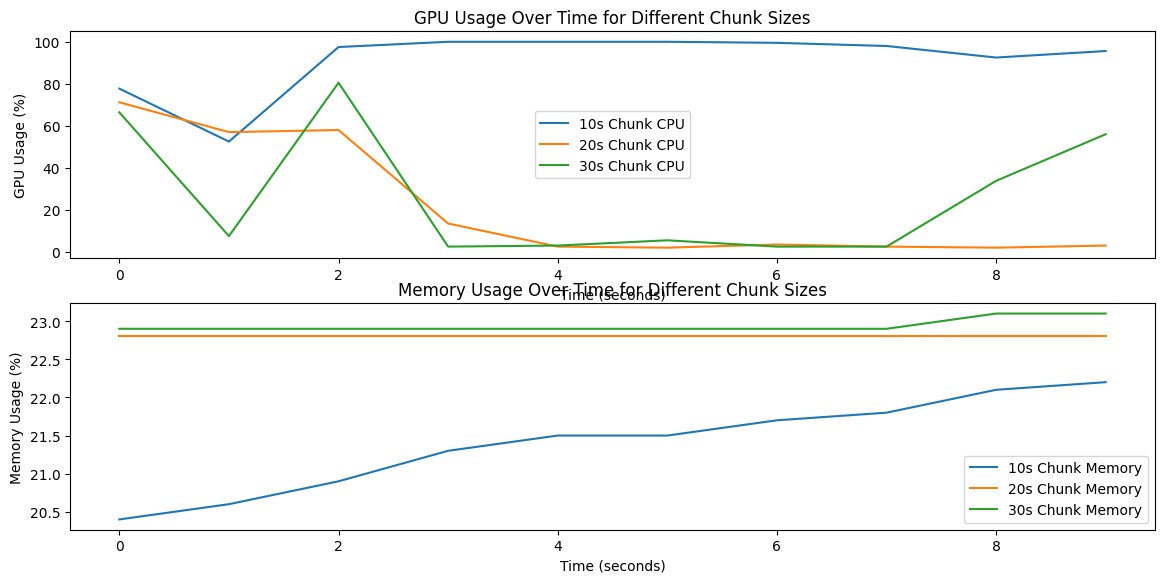

In [ ]:
import psutil
import time
import whisper
import matplotlib.pyplot as plt
import GPUtil

chunk_durations = [10, 20, 30]

cpu_data = {d: [] for d in chunk_durations}
mem_data = {d: [] for d in chunk_durations}
gpu_data = {d: [] for d in chunk_durations}  # NEW: GPU load tracking

def monitor_resources(duration, cpu_list, mem_list, gpu_list):
    for _ in range(10):
        cpu = psutil.cpu_percent()
        mem = psutil.virtual_memory().percent
        gpus = GPUtil.getGPUs()
        gpu_load = gpus[0].load * 100 if gpus else 0

        cpu_list.append(cpu)
        mem_list.append(mem)
        gpu_list.append(gpu_load)
        time.sleep(1)

def process_chunk_size(duration):
    print(f"\n========== Transcribing {duration}s Chunk ==========")
    model = whisper.load_model("base").to("cuda" if GPUtil.getGPUs() else "cpu")
    chunk_path = f"/content/drive/MyDrive/OS-Project/audio_chunks_{duration}s/chunk_0.mp3"

    monitor_resources(duration, cpu_data[duration], mem_data[duration], gpu_data[duration])
    start_time = time.time()
    result = model.transcribe(chunk_path)
    end_time = time.time()

    print(f"\n✅ Chunk Size: {duration}s")
    print(f"⏱️ Time Taken: {end_time - start_time:.2f} seconds")
    print(f"📝 Transcription:\n{result['text']}")

for duration in chunk_durations:
    process_chunk_size(duration)

# 📊 Plotting
plt.figure(figsize=(14, 10))


plt.subplot(3, 1, 1)
for duration in chunk_durations:
    plt.plot(cpu_data[duration], label=f"{duration}s Chunk CPU")
plt.xlabel("Time (seconds)")
plt.ylabel("GPU Usage (%)")
plt.title("GPU Usage Over Time for Different Chunk Sizes")
plt.legend()

# Plot Memory usage
plt.subplot(3, 1, 2)
for duration in chunk_durations:
    plt.plot(mem_data[duration], label=f"{duration}s Chunk Memory")
plt.xlabel("Time (seconds)")
plt.ylabel("Memory Usage (%)")
plt.title("Memory Usage Over Time for Different Chunk Sizes")
plt.legend()



Note that the percent shows 1 second, so if 2 messages pop up of it using 100% that means that it uses CPU 100% for 2 seconds

This one is not in percent